In [1]:
#Change theme 'jt -t monokai', list 'jt -l', reset 'jt -r'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Test Plot

In [2]:
data = pd.read_csv("cmake-build-debug/bench.csv")
#print(data)
#print(data.columns.tolist())

In [3]:
pd.concat([data,pd.read_csv("cmake-build-debug/bench.csv")])

NumCores  NumMPIProcs  NumOMPThreads         Method  CostRelaxation  \
0          1            1              1      FringeSeq             1.0   
1          1            1              1      FringeSeq             1.0   
2          1            1              1      FringeSeq             1.0   
3          1            1              1      FringeSeq             1.0   
4          1            1              1          Astar             1.0   
5          1            1              1          Astar             1.0   
6          1            1              1          Astar             1.0   
7          1            1              1          Astar             1.0   
8          1            1              1      FringeOMP             1.0   
9          1            1              1      FringeOMP             1.0   
10         1            1              1      FringeOMP             1.0   
11         1            1              1      FringeOMP             1.0   
12         1            1              1      FringeSeq             1.0   
13         1            1              1      FringeSeq             1.0   
14         1            1              1      FringeSeq             1.0   
15         1            1              1      FringeSeq             1.0   
16         1            1              1          Astar             1.0   
17         1            1              1          Astar             1.0   
18         1            1              1          Astar             1.0   
19         1            1              1          Astar             1.0   
20         1            1              1      FringeOMP             1.0   
21         1            1              1      FringeOMP             1.0   
22         1            1              1      FringeOMP             1.0   
23         1            1              1      FringeOMP             1.0   
24         1            1              1      FringeSeq           100.0   
25         1            1              1      FringeSeq           100.0   
26         1            1              1      FringeSeq           100.0   
27         1            1              1      FringeSeq           100.0   
28         1            1              1          Astar           100.0   
29         1            1              1          Astar           100.0   
..       ...          ...            ...            ...             ...   
42         1            1              1      FringeSeq           100.0   
43         1            1              1      FringeSeq           100.0   
44         1            1              1          Astar           100.0   
45         1            1              1          Astar           100.0   
46         1            1              1          Astar           100.0   
47         1            1              1          Astar           100.0   
48         1            1              1      FringeOMP           100.0   
49         1            1              1      FringeOMP           100.0   
50         1            1              1      FringeOMP           100.0   
51         1            1              1      FringeOMP           100.0   
52         1            1              1      FringeMPI           100.0   
53         1            1              1      FringeMPI           100.0   
54         1            1              1      FringeMPI           100.0   
55         1            1              1      FringeMPI           100.0   
56         1            1              1      FringeSeq           100.0   
57         1            1              1      FringeSeq           100.0   
58         1            1              1      FringeSeq           100.0   
59         1            1              1      FringeSeq           100.0   
60         1            1              1          Astar           100.0   
61         1            1              1          Astar           100.0   
62         1            1              1          Astar           100.0   
63         1            1    

In [4]:
sns.violinplot(data=data, x=data['NumCores'], y=data['Runtime'], hue=data['Method'], 
               palette="muted", split=True)

ValueError: There must be exactly two hue levels to use `split`.'

In [27]:
#Merge data from several csv's if required
data = pd.concat([pd.read_csv("cmake-build-debug/bench.csv"), pd.read_csv("cmake-build-debug/bench2.csv")])

In [40]:
del data

# Plot A Single MPI Run

In [119]:
folder="out/102/"
# folder="out/61/"
# folder="out/euler/115/"
# folder="cmake-build-release/"

In [120]:
data0 = pd.read_csv(folder + "0mpi2omp.csv")
data1 = pd.read_csv(folder + "1mpi2omp.csv")

In [121]:
data = pd.concat([data0,data1], axis=1)
print(data.shape)
data.columns = ["r0Ratio", "r0OMPTime", "r0Time", "r0nowSize",# "r0Skipped",
                 "r1Ratio", "r1OMPTime", "r1Time", "r1nowSize"#, "r1Skipped"
                ]

(2025, 8)


In [80]:
datac = pd.concat([data0,data1], axis=1)
datac.columns = ["r0Ratio2n", "r0OMPTime", "r0Time2n", "r0nowSize2n",# "r0Skipped",
                 "r1Ratio2n", "r1OMPTime", "r1Time2n", "r1nowSize2n"#, "r1Skipped"
                ]
data = pd.concat([data, datac], axis=1)

In [122]:
# del data['r0OmpTime']
# del data['r1OmpTime']
data['r0Time'] = data['r0OMPTime']
data['r1Time'] = data['r1OMPTime']

In [123]:
data.head()

r0Ratio  r0OMPTime    r0Time  r0nowSize   r1Ratio  r1OMPTime    r1Time  \
0  0.776747   0.000027  0.000027          2   1.57145   0.000026  0.000026   
1  0.984541   0.000008  0.000008          4   5.72636   0.000003  0.000003   
2  2.281670   0.000008  0.000008          5   1.85823   0.000010  0.000010   
3  0.799255   0.000011  0.000011          8   9.87482   0.000002  0.000002   
4  0.455605   0.000013  0.000013          8  10.22680   0.000002  0.000002   

   r1nowSize  
0          0  
1          0  
2          0  
3          0  
4          0

In [124]:
data = data.rolling(15).mean()

In [125]:
# print(sns.color_palette("Set1", n_colors=8, desat=.5))
pal = [(0.696078431372549, 0.30000000000000004, 0.30392156862745096),
 (0.3950980392156863, 0.5872549019607843, 0.38921568627450986), 
# (0.75, 0.49901960784313726, 0.25), (0.8, 0.8, 0.3999999999999999)
      ]

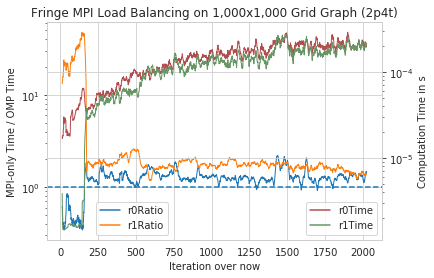

In [126]:
sns.set_style("whitegrid")
ax = sns.lineplot(data=data[['r0Ratio', 'r1Ratio'#, 'r0Ratio2n', 'r1Ratio2n' #, 'r0Time', 'r1Time'
                            ]], linewidth=1, dashes=False)
ax.set(xlabel='Iteration over now', yscale='log')
ax.set_ylabel(ylabel='MPI-only Time / OMP Time')
ax.axhline(1, ls="--")

ax2 = ax.twinx()
sns.lineplot(data=data[['r0Time', 'r1Time'#, 'r0Time2n', 'r1Time2n'
                       ]], linewidth=1, dashes=False, palette=pal)
ax2.set(ylabel='Computation Time in s', title='Fringe MPI Load Balancing on 1,000x1,000 Grid Graph (2p4t)', yscale='log')


ax.legend(loc='center left', bbox_to_anchor=(.13, .1), ncol=1)
ax2.legend(loc='center right', bbox_to_anchor=(1, .1), ncol=1)

In [127]:
ax2.get_figure().savefig(folder + "loadBalancing.pdf", bbox_inches='tight')

# Plot All from a Bench

In [49]:
import sys, os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

"""
Select data, use default bench.csv if no args
Or pass list of csv's to use, skips invalid files
"""
#Jupyter only!
argv=["out/euler/39/bench.csv"
    , "out/euler/40/bench.csv"
    , "out/euler/41/bench.csv"
    , "out/euler/42/bench.csv"
    , "out/euler/43/bench.csv"
    , "out/euler/44/bench.csv"
    , "out/euler/45/bench.csv"
    , "out/euler/64/bench.csv"]
data = pd.read_csv(argv[1], skipinitialspace=True)
for i in argv[2:]:
    if os.path.exists(i):
        data = pd.concat([data, pd.read_csv(i, skipinitialspace=True)])
    else:
        print(i, " skipped")        

print("Data Shape: ", data.shape)
data.head()

Data Shape:  (361, 8)


NumCores  NumMPIProcs  NumOMPThreads     Method  CostRelaxation  \
0         4            1              4  FringeOMP             1.0   
1         4            1              4  FringeOMP             1.0   
2         4            1              4  FringeOMP             1.0   
3         4            1              4  FringeOMP             1.0   
4         4            1              4  FringeOMP             1.0   

   AvgFringeSize  PathLength   Runtime  
0          14168    16806.26  16.15936  
1          14163    16807.53  16.10607  
2          14172    16806.72  16.16278  
3          14166    16806.51  15.97943  
4          14174    16806.87  15.93326

In [50]:
### Pre-Processing ###
seqRunTime = data[data['Method'] == 'FringeSeq']['Runtime'].mean()
ompRunTimeOneCore = data[(data['NumCores'] == 1) & (data['Method'] == 'FringeOMP')]['Runtime'].mean()
print(seqRunTime)
print(ompRunTimeOneCore)

seqLinearSpeedup = []
ompLinearSpeedup = []
for i in range(0, (data['NumCores'].value_counts().size)):
    seqLinearSpeedup.append(seqRunTime / (i+1))
    ompLinearSpeedup.append(ompRunTimeOneCore / (i+1))

maxCores = data['NumCores'].max()

data['Speedup'] = data['Runtime'].apply(lambda x: seqRunTime / x)
data.head()

correctPathLength = data[data['Method'] == 'Astar']['PathLength'].min()
data['PathLengthError'] = (data['PathLength']/correctPathLength)

13.174351600000001
17.59546


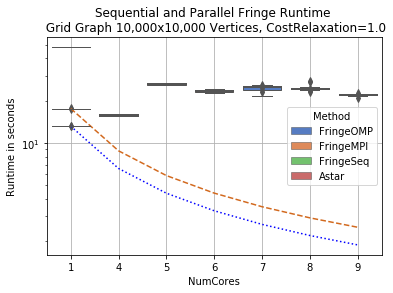

In [57]:
### BoxPlot ###
ax1 = sns.boxplot(data=data, x=data['NumCores'], y=data['Runtime'], hue=data['Method'],
                  palette="muted", linewidth=1.0, dodge=False, saturation=0.8)
ax1.plot(seqLinearSpeedup, c="blue", ls=":", mec="gray", mew=0.1)
ax1.plot(ompLinearSpeedup, c="chocolate", ls="--", mec="gray", mew=0.1)
ax1.set(yscale="log", ylabel='Runtime in seconds', title='Sequential and Parallel Fringe Runtime \n Grid Graph 10,000x10,000 Vertices, CostRelaxation=1.0')
ax1.grid(True)

# TODO: set edge colors of boxes to fill color
#set edge colors
# for i,artist in enumerate(ax2.artists):
#     col = artist.get_facecolor()

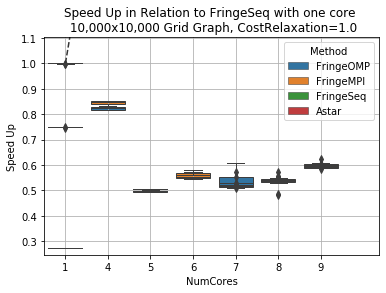

In [52]:
### SpeedupPlot ###
ax2 = sns.boxplot(data=data, x='NumCores', y='Speedup', hue=data['Method'], dodge=False, linewidth=1.0)
ax2.set(ylabel='Speed Up', title='Speed Up in Relation to FringeSeq with one core \n 10,000x10,000 Grid Graph, CostRelaxation=1.0')
ax2.plot(np.arange(1, maxCores), c=".2", ls="--")
ax2.set(ylim=[data['Speedup'].min() *0.9, data['Speedup'].max() * 1.1])
ax2.grid(True)

[Text(0, 0.5, 'Error compared to true shortest Path'),
 Text(0.5, 1.0, 'Relaxation Error on Grid Graph')]

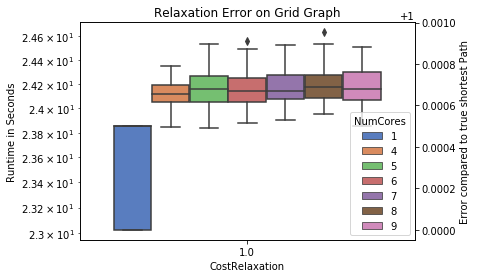

In [53]:
### Correctness Plot ###
# Add Runtime Line
ax3 = sns.lineplot(data=data, x='CostRelaxation', y='Runtime', color="r")
ax3.set(yscale="log", ylabel='Runtime in Seconds')

# Add PathLengthError boxes
ax4 = ax3.twinx()

sns.boxplot(data=data, x='CostRelaxation', y='PathLengthError', color="r", hue='NumCores', palette="muted")
ax4.set(ylabel='Error compared to true shortest Path', title='Relaxation Error on Grid Graph')

7


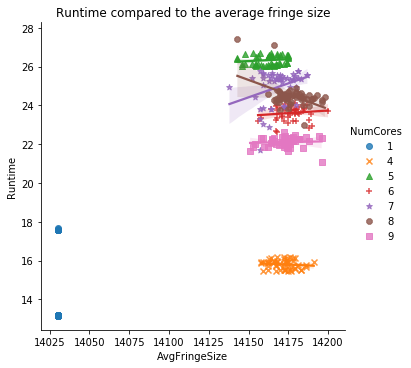

In [54]:
### FringeSizePlot ###
dataNoAstar=data[data['Method'] != 'Astar']

#adapt length of marker array
print(len(dataNoAstar['NumCores'].unique()))
marker = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'V']
markers = [marker[i] for i in range(len(dataNoAstar["NumCores"].unique()))]

ax5 = sns.lmplot(data=dataNoAstar, x="AvgFringeSize", y="Runtime", hue="NumCores", truncate=True, markers=markers)
ax5.set(title='Runtime compared to the average fringe size')